In [1]:
import pandas as pd
import matplotlib as mat
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('data/college_state_pop.csv')

Question of Interest:

What factors influence graduation rates across 1000 US schools. 

In [3]:
data.head()

,Student_Size,Tuition_In_State,Tuition_Out_State,Female_Share,Race_White,Race_Black,Race_Hispanic,Race_Asian,Race_AIAN,Race_NHPI,Race_Two_Or_More,Grad_Rate,School_Name,City,State,id,July_Estimate_2024,Region
0,5726.0,10024.0,18634.0,0.564030,0.0180,0.9043,0.0150,0.0017,0.0012,0.0010,0.0182,0.2772,Alabama A & M University,Normal,AL,100654,2381817.0,South
1,12118.0,8832.0,21864.0,0.639091,0.4832,0.2657,0.0776,0.0915,0.0020,0.0007,0.0515,0.6345,University of Alabama at Birmingham,Birmingham,AL,100663,2381817.0,South
2,226.0,NaN,NaN,0.648649,0.2788,0.6681,0.0310,0.0000,0.0044,0.0044,0.0000,NaN,Amridge University,Montgomery,AL,100690,2381817.0,South
3,6650.0,11770.0,24662.0,0.476350,0.6940,0.0907,0.0719,0.0423,0.0074,0.0015,0.0508,0.6240,University of Alabama in Huntsville,Huntsville,AL,100706,2381817.0,South
4,3322.0,11248.0,19576.0,0.613419,0.0223,0.9082,0.0111,0.0018,0.0015,0.0012,0.0126,0.2884,Alabama State University,Montgomery,AL,100724,2381817.0,South


In [4]:
#what are the na values in grad rate?

na_counts = data.isna().sum()
print(na_counts)

Student_Size           63
Tuition_In_State      274
Tuition_Out_State     274
Female_Share          137
Race_White             63
Race_Black             63
Race_Hispanic          63
Race_Asian             63
Race_AIAN              63
Race_NHPI              63
Race_Two_Or_More       63
Grad_Rate             122
School_Name             0
City                    0
State                   0
id                      0
July_Estimate_2024     12
Region                374
dtype: int64


In [5]:
#take the mean grad rate for each state and replace the na values in grad rate with the mean for the state

data['Grad_Rate']= data['Grad_Rate'].fillna(data.groupby('State')['Grad_Rate'].transform('mean'))

#same for in state and out state tutition

data['Tuition_In_State']= data['Tuition_In_State'].fillna(data.groupby('State')['Tuition_In_State'].transform('mean'))

data['Tuition_Out_State']= data['Tuition_Out_State'].fillna(data.groupby('State')['Tuition_Out_State'].transform('mean'))


In [6]:
na_counts = data.isna().sum()
print(na_counts)

Student_Size           63
Tuition_In_State        1
Tuition_Out_State       1
Female_Share          137
Race_White             63
Race_Black             63
Race_Hispanic          63
Race_Asian             63
Race_AIAN              63
Race_NHPI              63
Race_Two_Or_More       63
Grad_Rate               1
School_Name             0
City                    0
State                   0
id                      0
July_Estimate_2024     12
Region                374
dtype: int64


<Axes: xlabel='Tuition_In_State', ylabel='Grad_Rate'>

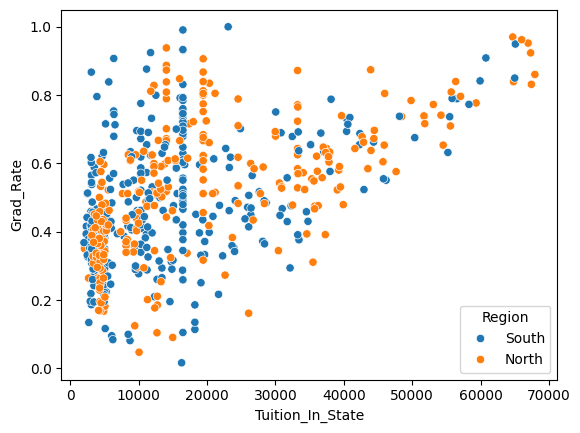

In [23]:
# scatter x= grad rate ; y= tuition instate ; hue = region

sns.scatterplot(data=data, x="Tuition_In_State", y="Grad_Rate", hue="Region")

<Axes: xlabel='Grad_Rate', ylabel='Tuition_Out_State'>

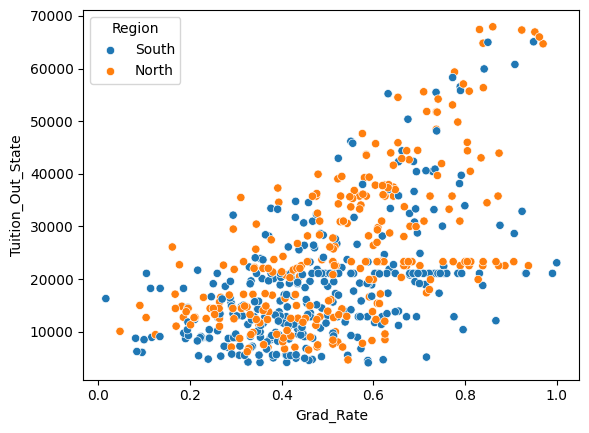

In [8]:

sns.scatterplot(data=data, x="Grad_Rate", y="Tuition_Out_State", hue="Region")

In [9]:
#group by region compute mean

region_grp_grad = data.groupby('Region')['Grad_Rate'].mean()
print(region_grp_grad)

Region
North    0.528275
South    0.485431
Name: Grad_Rate, dtype: float64


In [10]:
region_grp_intut = data.groupby('Region')['Tuition_In_State'].mean()
print(region_grp_intut)

Region
North    20369.205183
South    14862.482362
Name: Tuition_In_State, dtype: float64


In [11]:
region_grp_outtut = data.groupby('Region')['Tuition_Out_State'].mean()
print(region_grp_outtut)

Region
North    25344.315139
South    18830.970052
Name: Tuition_Out_State, dtype: float64


In [12]:
state_grp = data.groupby('State')['Grad_Rate'].mean()
print(state_grp)

State
AK    0.491314
AL    0.396898
AR    0.462617
AZ    0.428985
CA    0.525233
CO    0.517437
CT    0.625406
DC    0.654925
DE    0.493286
FL    0.551218
GA    0.435044
HI    0.410892
ID    0.520750
IL    0.511828
IN    0.534775
MN         NaN
NM    0.537000
NY    0.125000
Name: Grad_Rate, dtype: float64


In [13]:
state_sum = data.groupby('State')['State'].count()
print(state_sum)

State
AK      8
AL     55
AR     58
AZ     40
CA    313
CO     51
CT     35
DC     12
DE      8
FL    122
GA     78
HI     12
ID     14
IL    156
IN     35
MN      1
NM      1
NY      1
Name: State, dtype: int64


In [24]:
region_count = data.groupby('Region')['Region'].count()
print(region_count)

Region
North    293
South    333
Name: Region, dtype: int64


In [14]:
#run regrression mod

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
data['Region_numeric'] = data['Region'].replace({'North': 1, 'South': 0})

/var/folders/zr/75ztt57546j3r2mnk99r8vsr0000gn/T/ipykernel_89304/1227234730.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Region_numeric'] = data['Region'].replace({'North': 1, 'South': 0})


In [16]:
#drop remaining na vals 

dropped_na = data.dropna()

In [17]:
dropped_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536 entries, 0 to 999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Student_Size        536 non-null    float64
 1   Tuition_In_State    536 non-null    float64
 2   Tuition_Out_State   536 non-null    float64
 3   Female_Share        536 non-null    float64
 4   Race_White          536 non-null    float64
 5   Race_Black          536 non-null    float64
 6   Race_Hispanic       536 non-null    float64
 7   Race_Asian          536 non-null    float64
 8   Race_AIAN           536 non-null    float64
 9   Race_NHPI           536 non-null    float64
 10  Race_Two_Or_More    536 non-null    float64
 11  Grad_Rate           536 non-null    float64
 12  School_Name         536 non-null    object 
 13  City                536 non-null    object 
 14  State               536 non-null    object 
 15  id                  536 non-null    int64  
 16  July_Estimate

In [18]:
X = dropped_na[['Student_Size', 'Tuition_In_State', 'Tuition_Out_State', 'Race_White', 'Race_Black',
'Race_Asian', 'Race_Hispanic', 'July_Estimate_2024', 'Region_numeric']]
y = dropped_na['Grad_Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Coefficients: [ 1.56613036e-06 -1.09188303e-06  9.32964947e-06  2.58522302e-01
  7.85073951e-02  4.58318207e-01  1.56252786e-01  8.39819487e-09
 -3.11261879e-02]
Intercept: 0.09035287504961192
Mean Squared Error: 0.01809667305010439
R-squared: 0.3559467657352686


In [19]:
model = LinearRegression()
model.fit(X, y)

# 3. Extract the coefficients
coefficients = model.coef_
intercept = model.intercept_

# 4. Combine into a DataFrame for better readability
# Create a DataFrame for coefficients
coefficients_df = pd.DataFrame(coefficients, index=X.columns, columns=['Coefficient'])

# Add the intercept as a separate row
intercept_df = pd.DataFrame([intercept], index=['Intercept'], columns=['Coefficient'])

# Concatenate the coefficients and intercept DataFrames
full_coefficients_df = pd.concat([coefficients_df, intercept_df])

print("Coefficient Matrix:")
print(full_coefficients_df)


Coefficient Matrix:
                     Coefficient
Student_Size        1.136990e-06
Tuition_In_State   -4.452886e-07
Tuition_Out_State   8.170164e-06
Race_White          2.630656e-01
Race_Black          6.060531e-02
Race_Asian          6.206790e-01
Race_Hispanic       1.716615e-01
July_Estimate_2024  6.125138e-09
Region_numeric     -3.894459e-02
Intercept           1.185007e-01


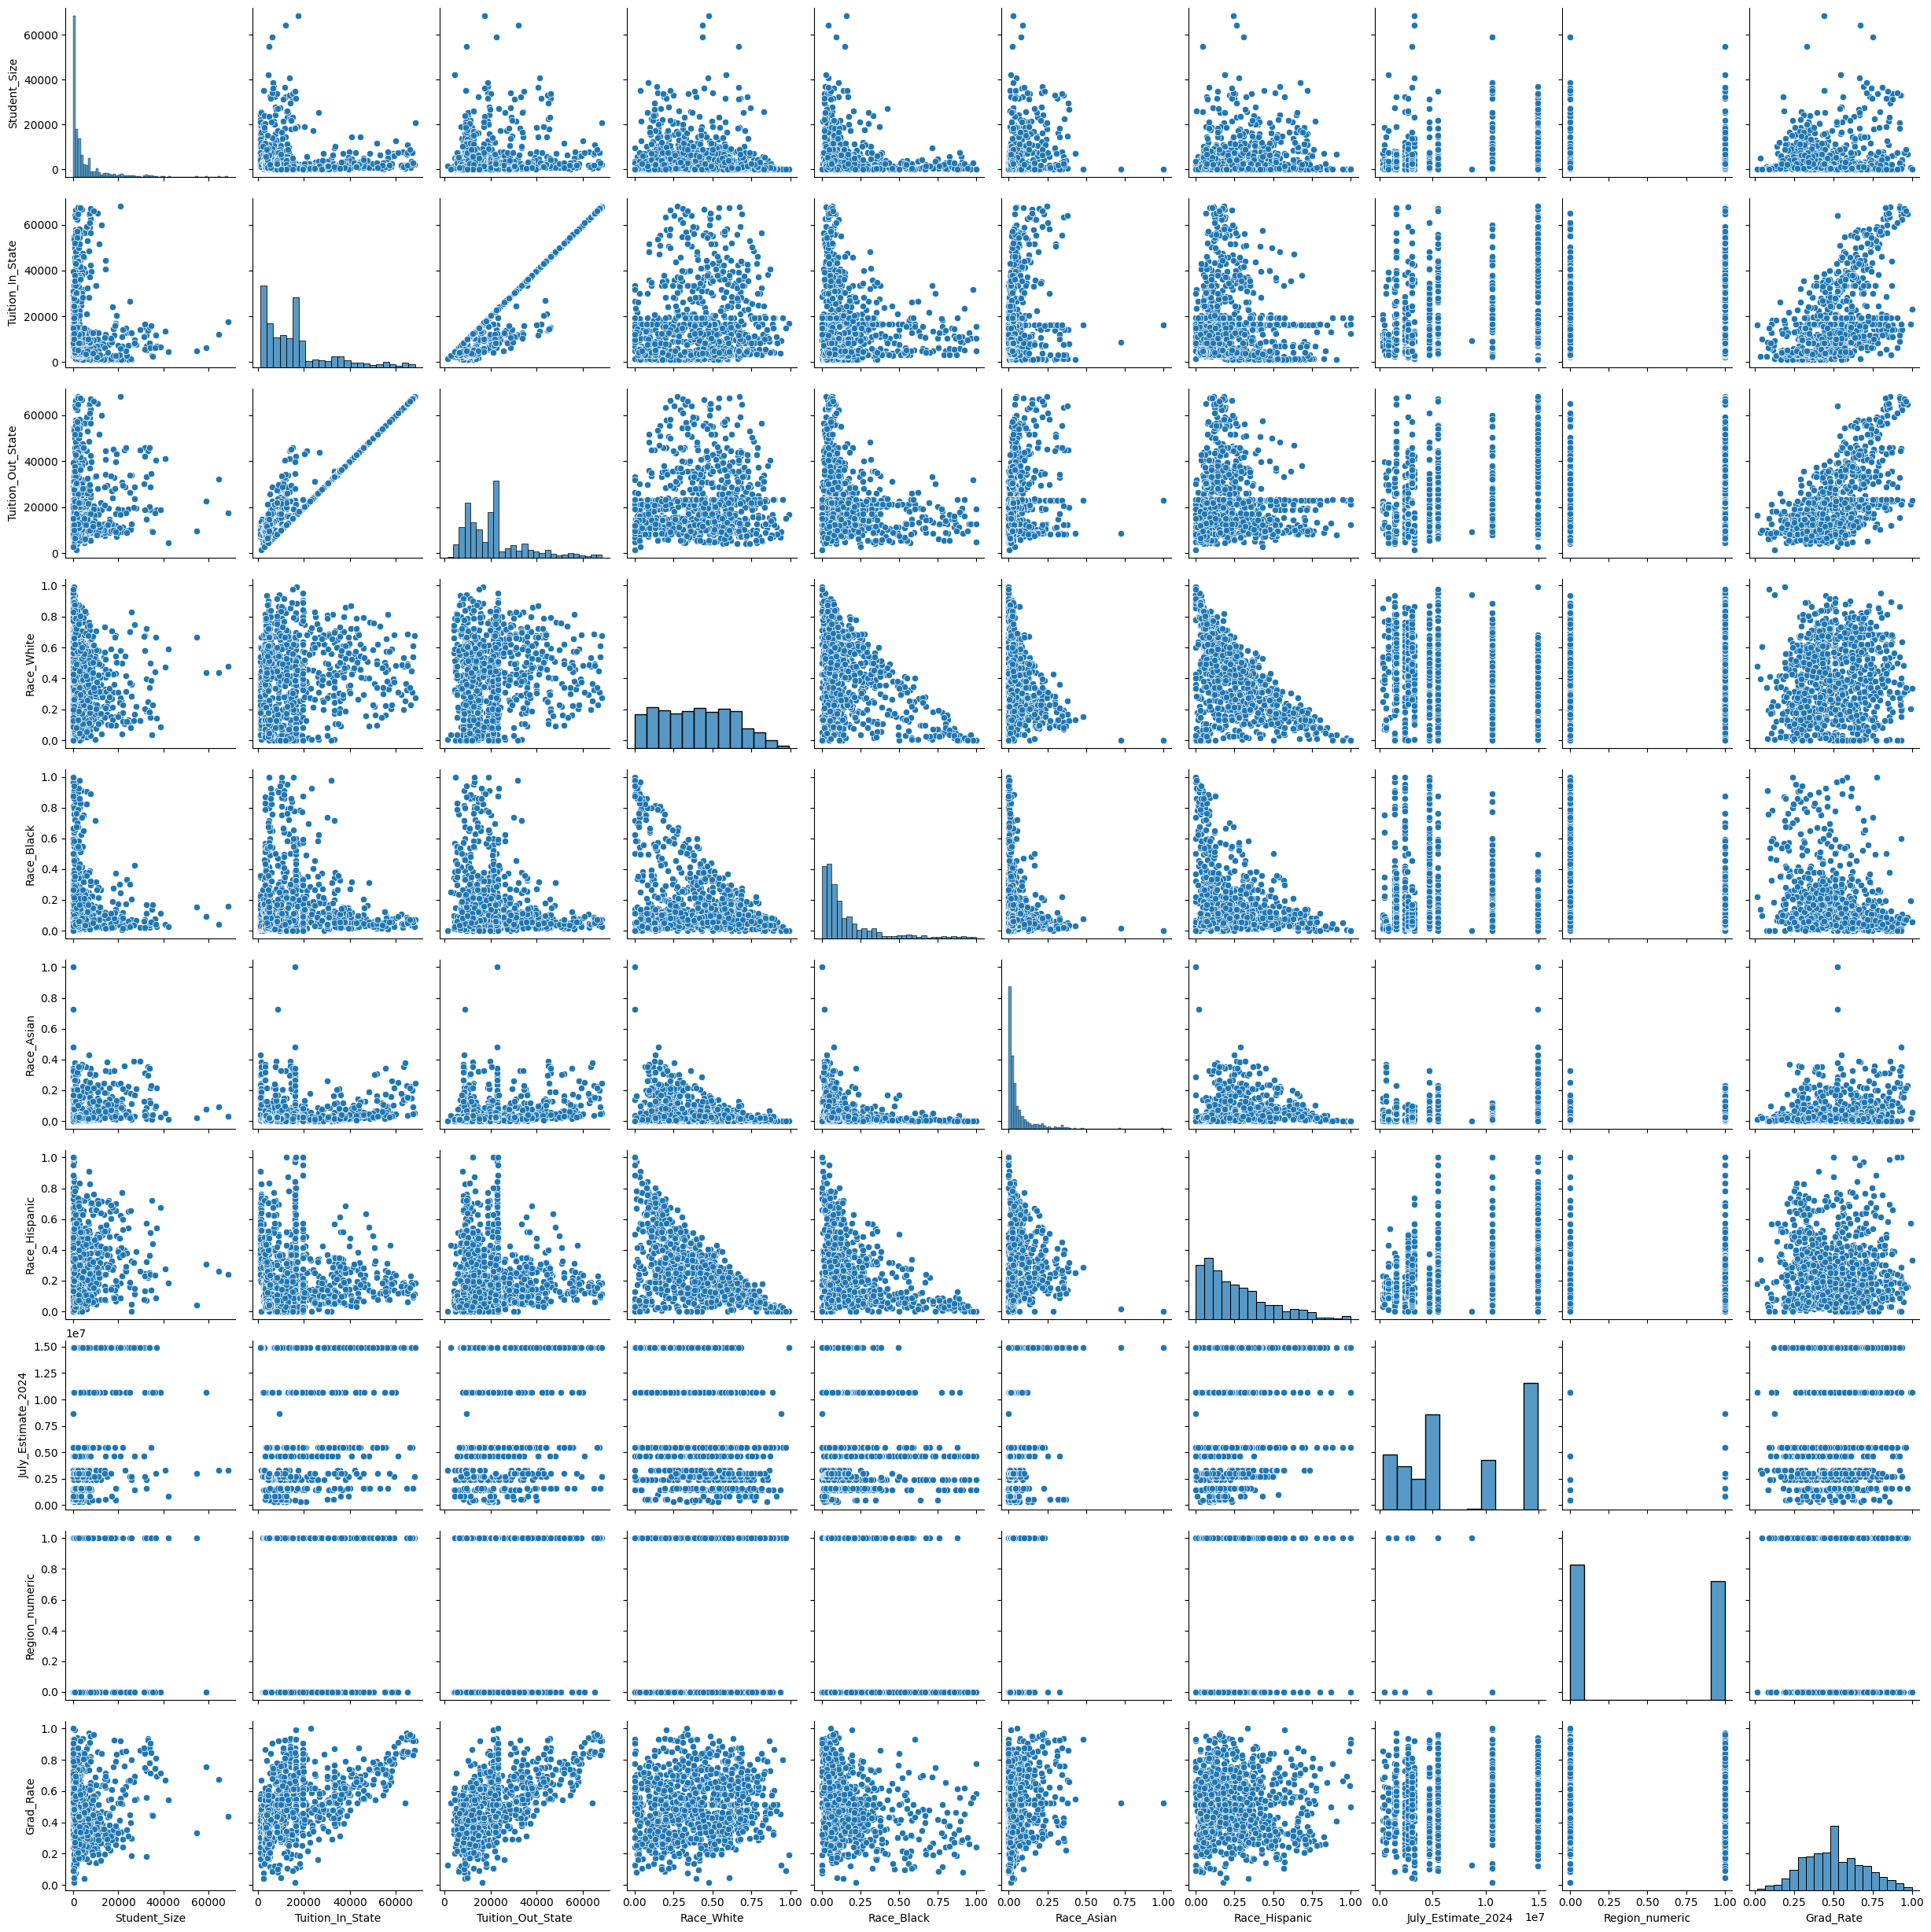

In [20]:
sns.pairplot(data[['Student_Size', 'Tuition_In_State', 'Tuition_Out_State', 'Race_White', 'Race_Black',
'Race_Asian', 'Race_Hispanic', 'July_Estimate_2024', 'Region_numeric','Grad_Rate']])

In [22]:
data.describe()

,Student_Size,Tuition_In_State,Tuition_Out_State,Female_Share,Race_White,Race_Black,Race_Hispanic,Race_Asian,Race_AIAN,Race_NHPI,Race_Two_Or_More,Grad_Rate,id,July_Estimate_2024,Region_numeric
count,937.000000,999.000000,999.000000,863.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,999.000000,1000.0000,9.880000e+02,626.000000
mean,4894.967983,16573.863232,21850.204571,0.605576,0.398195,0.166731,0.256833,0.057257,0.009128,0.003922,0.043904,0.507368,126723.1950,7.947942e+06,0.468051
std,8109.876927,15071.625576,13353.262561,0.140958,0.237496,0.201430,0.208431,0.086143,0.040523,0.009823,0.043415,0.188189,15159.9182,5.400004e+06,0.499377
min,2.000000,1104.000000,1410.000000,0.025592,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016700,100654.0000,3.304630e+05,0.000000
25%,375.000000,4881.000000,11396.000000,0.543774,0.194500,0.040600,0.092100,0.009900,0.000900,0.000000,0.019600,0.368750,112439.7500,3.026199e+06,0.000000
50%,1614.000000,14067.394737,20544.000000,0.598770,0.398600,0.090700,0.200000,0.026200,0.002500,0.001300,0.037500,0.511828,127171.5000,5.482770e+06,0.000000
75%,5697.000000,19449.607143,24224.000000,0.665277,0.590500,0.200000,0.368500,0.064900,0.005900,0.003500,0.055300,0.633700,139988.2500,1.487790e+07,1.000000
max,68619.000000,68237.000000,68237.000000,0.978996,0.993600,1.000000,1.000000,1.000000,0.990700,0.100000,0.431900,1.000000,151388.0000,1.487790e+07,1.000000
